<a href="https://colab.research.google.com/github/mohit-singh4180/-ecommerce_microServices/blob/master/ANN_algo_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv('reg.csv')


In [3]:
dataset.head()


,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
dataset=dataset[["feature1","feature2","price"]]

In [5]:
dataset

,feature1,feature2,price
0,999.787558,999.766096,461.527929
1,998.861615,1001.042403,548.130011
2,1000.070267,998.844015,410.297162
3,999.952251,1000.440940,540.382220
4,1000.446011,1000.338531,546.024553
...,...,...,...
995,1000.018988,999.672732,476.526078
996,998.855379,1000.020026,457.313186
997,1001.451646,998.847606,456.720992
998,1000.771023,998.562851,403.315576


In [6]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
x_scaled=scaler.transform(X)
x_scaled

array([[0.44380388, 0.4885581 ],
       [0.29323398, 0.71363026],
       [0.48977598, 0.32595231],
       ...,
       [0.7144056 , 0.32658556],
       [0.60372768, 0.27637009],
       [0.35350286, 0.78575664]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)


In [9]:
X_train.shape

(800, 2)

In [10]:
X_test.shape

(200, 2)

**Creating artificial neural network ANN**


**1st way to create ANN model**

In [11]:
from tensorflow.python.keras.layers.core import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
### If we have 3 layer pass 3 arguments and so on
## we use relu if activation layer are hidden layers

###model=Sequential([Dense(units= 4,activation="relu") ,Dense(units= 2,activation="relu"),Dense(units= 1,activation="relu") ])
##

**2nd way to create ANN model**

In [12]:
### constructing neural network

model=Sequential()
model.add(Dense(4,activation="relu")) ### 1st hidden layer with 4 neural  and relu is activation
model.add(Dense(2,activation="relu")) ### 2nd hidden layer with 2 neural  and relu is activation
model.add(Dense(1,activation="relu")) ### 3rd hidden layer with q neural  and relu is activation

from keras import optimizers
### to optimize the weight and to reduce the weight to attain global minimum
model.compile(optimizer="rmsprop" ,loss="mse")

### epoch= number of time data passed
###batch_size =1 means every epoch will be having all training data
### if batch_size=2 then every epoch will be having 400 data 
model.fit(X_train,y_train,epochs=25,batch_size=1)





Epoch 1/25
800/800 [==============================] - 4s 3ms/step - loss: 257552.4062
Epoch 2/25
800/800 [==============================] - 3s 4ms/step - loss: 257552.5000
Epoch 3/25
800/800 [==============================] - 3s 3ms/step - loss: 257552.3594
Epoch 4/25
800/800 [==============================] - 3s 3ms/step - loss: 257552.2656
Epoch 5/25
800/800 [==============================] - 3s 4ms/step - loss: 257552.3750
Epoch 6/25
800/800 [==============================] - 3s 4ms/step - loss: 257552.3438
Epoch 7/25
800/800 [==============================] - 3s 3ms/step - loss: 257552.3750
Epoch 8/25
800/800 [==============================] - 2s 3ms/step - loss: 257552.2969
Epoch 9/25
800/800 [==============================] - 3s 3ms/step - loss: 257552.4062
Epoch 10/25
800/800 [==============================] - 3s 4ms/step - loss: 257552.1875
Epoch 11/25
800/800 [==============================] - 3s 3ms/step - loss: 257552.4219
Epoch 12/25
800/800 [==============================]

In [13]:
model.history.history.keys()

dict_keys(['loss'])

In [14]:
###check all statistics of the neuron and weight
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 4)                    12        
                                                                 
 dense_1 (Dense)             (1, 2)                    10        
                                                                 
 dense_2 (Dense)             (1, 1)                    3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.history.history

{'loss': [257552.40625,
  257552.5,
  257552.359375,
  257552.265625,
  257552.375,
  257552.34375,
  257552.375,
  257552.296875,
  257552.40625,
  257552.1875,
  257552.421875,
  257552.1875,
  257552.40625,
  257552.34375,
  257552.359375,
  257552.296875,
  257552.484375,
  257552.34375,
  257552.359375,
  257552.296875,
  257552.453125,
  257552.265625,
  257552.21875,
  257552.296875,
  257552.453125]}

In [16]:
model.history.history["loss"]

[257552.40625,
 257552.5,
 257552.359375,
 257552.265625,
 257552.375,
 257552.34375,
 257552.375,
 257552.296875,
 257552.40625,
 257552.1875,
 257552.421875,
 257552.1875,
 257552.40625,
 257552.34375,
 257552.359375,
 257552.296875,
 257552.484375,
 257552.34375,
 257552.359375,
 257552.296875,
 257552.453125,
 257552.265625,
 257552.21875,
 257552.296875,
 257552.453125]

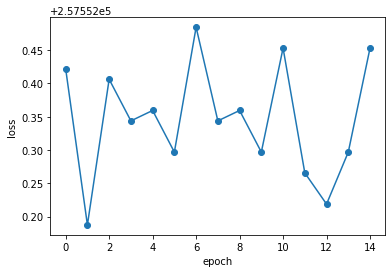

In [17]:
plt.plot(model.history.history["loss"][10:],marker="o")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

***Evaluate Model***

In [18]:
ypred=model.predict(X_test)
### calculate score for regression models
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,ypred)

0.0

In [19]:
result=pd.DataFrame(ypred,columns=["ypred"])
result["ytest"]=y_test
result["error"]=result["ytest"]-result["ypred"]

result

,ypred,ytest,error
0,0.0,518.356144,518.356144
1,0.0,551.650100,551.650100
2,0.0,511.366708,511.366708
3,0.0,518.127883,518.127883
4,0.0,547.624043,547.624043
...,...,...,...
195,0.0,465.999806,465.999806
196,0.0,521.774457,521.774457
197,0.0,625.079386,625.079386
198,0.0,396.928769,396.928769


In [20]:
result.sum()

ypred        0.000000
ytest    99542.977972
error    99542.977972
dtype: float64

In [21]:
###Squared error to remove negative values of error sum

result["error"]=result["error"]*result["error"]
result.sum()

ypred    0.000000e+00
ytest    9.954298e+04
error    5.141983e+07
dtype: float64

In [22]:
###Save ANN model
import tensorflow
tensorflow.keras.models.save_model(model,"reg_model.h5")

In [23]:
###Load/reuse the saved model
loaded_model=tensorflow.keras.models.load_model("reg_model.h5",compile=False)

In [24]:
normalizedInput=scaler.transform([[999.787558,999.766806]])

In [25]:
normalizedInput

array([[0.44380396, 0.48868327]])

In [26]:
loaded_model.predict(normalizedInput)

array([[0.]], dtype=float32)